<a href="https://colab.research.google.com/github/ITBA-Python/Certificacion-Profesional-Python/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../') 
import Helper as faux
import pandas as pd
import numpy as np
from datetime import datetime
from clases.Scores import Score




In [57]:
df_personas, df_trabajadores, df_usuarios, df_peliculas, df_sco=faux.load_all(file_personas='../data/personas.csv', file_trabajadores='../data/trabajadores.csv',
                                                                                  file_usuarios='../data/usuarios.csv', file_peliculas='../data/peliculas.csv', file_scores='../data/scores.csv')

In [12]:
df_sco.head()


,user_id,movie_id,rating,Date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [13]:
#Doy de Alta satisfactoriamente con el metodo write_df en Scores
NuevoScore = Score(idPelicula=22200,idUsuario=250,puntuacion=9,timestamp=datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
df_scoresAgregado = NuevoScore.write_df(df_sco)
print(f'Rows del df original: {df_sco.shape[0]}\nRows del df Agregado: {df_scoresAgregado.shape[0]}\n')


Rows del df original: 100000
Rows del df Agregado: 100001



In [14]:

#Doy de Alta un registro ya existente y lo actualizó con el metodo write_df en Scores
ScoreExistente = Score(idPelicula=200,idUsuario=250,puntuacion=8,timestamp=datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
df_scoresAgregado2 = ScoreExistente.write_df(df_sco)
print(f'Rows del df original: {df_sco.shape[0]}\nRows del df Agregado: {df_scoresAgregado2.shape[0]}\n')

filtered_df = df_sco[(df_sco['user_id'] == ScoreExistente.idUsuario) & (df_sco['movie_id'] == ScoreExistente.idPelicula)]
filtered_df_scoresAgregado = df_scoresAgregado2[(df_scoresAgregado2['user_id'] == ScoreExistente.idUsuario) & (df_scoresAgregado2['movie_id'] == ScoreExistente.idPelicula)]
print(f'Calificacion del Registro original:\n {filtered_df.head()}\n\nCalificacion del Registro updateado:\n{filtered_df_scoresAgregado.head()}\n')



Se actualizará la calificacion ya exstente para esa pelicula y de este usuario
Rows del df original: 100000
Rows del df Agregado: 100000

Calificacion del Registro original:
       user_id  movie_id  rating                Date
5047      250       200       5 1997-12-27 22:56:14

Calificacion del Registro updateado:
      user_id  movie_id  rating                 Date
5047      250       200       8  14/06/2024 12:06:31



In [15]:
#Vamos a Borrar del df original la pelicula con el score existente.
df_scoresEliminado = ScoreExistente.remove_from_df(df_sco)
print(f'Rows del df original: {df_sco.shape[0]}\nRows del df Agregado: {df_scoresEliminado.shape[0]}\n')


Rows del df original: 100000
Rows del df Agregado: 99999



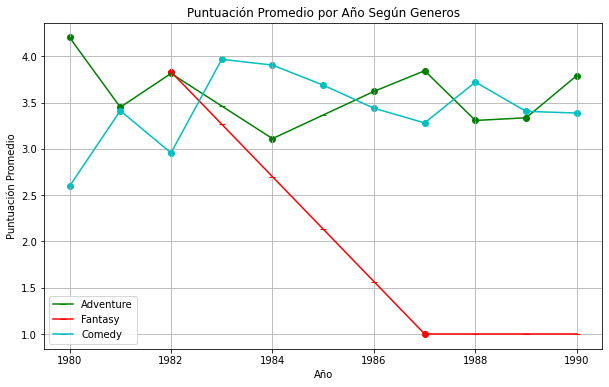

In [16]:
#STATS con JOIN entre Peliculas y Scores 
generosDeseadosList=['Adventure','Fantasy','Comedy']
Score.puntuacion_año_genero(df_peliculas,df_sco, generosDeseadosList,anios=[1980,1990])


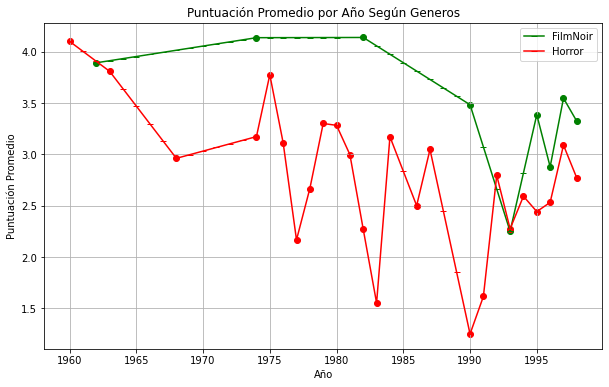

In [17]:
generosDeseadosList=['FilmNoir','Horror']
Score.puntuacion_año_genero(df_peliculas,df_sco, generosDeseadosList,anios=[1960,2000])

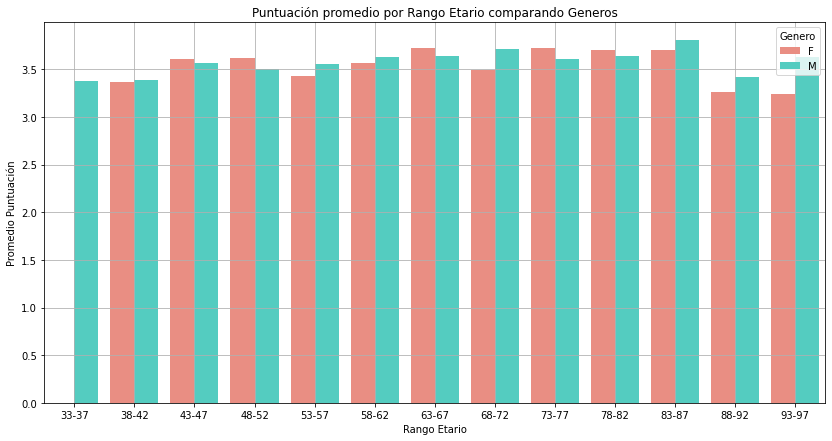

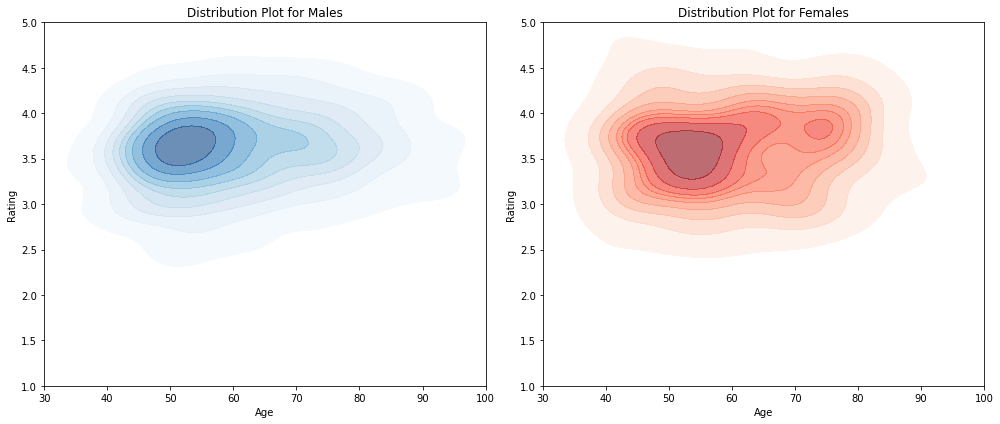

In [58]:
#STATS con JOIN entre Personas y Scores
Score.puntuacion_edad_genero(df_personas,df_sco)

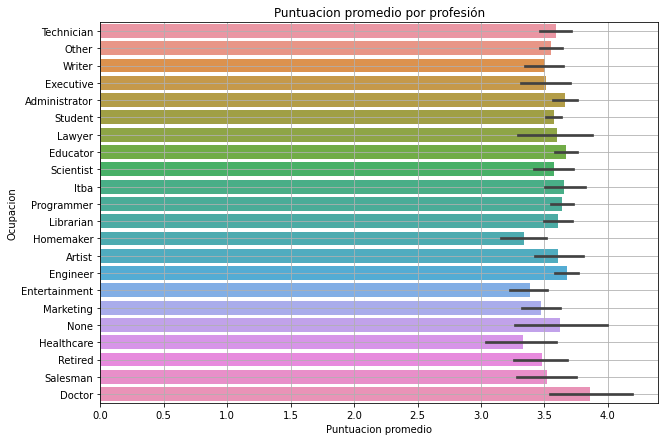

In [44]:
#STATS con JOIN entre Usuarios y Scores
Score.puntuacion_ocupacion_rating(df_usuarios,df_sco)


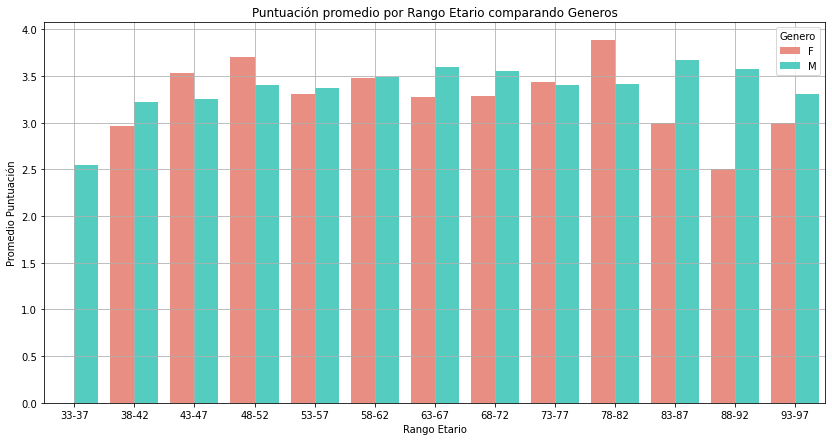

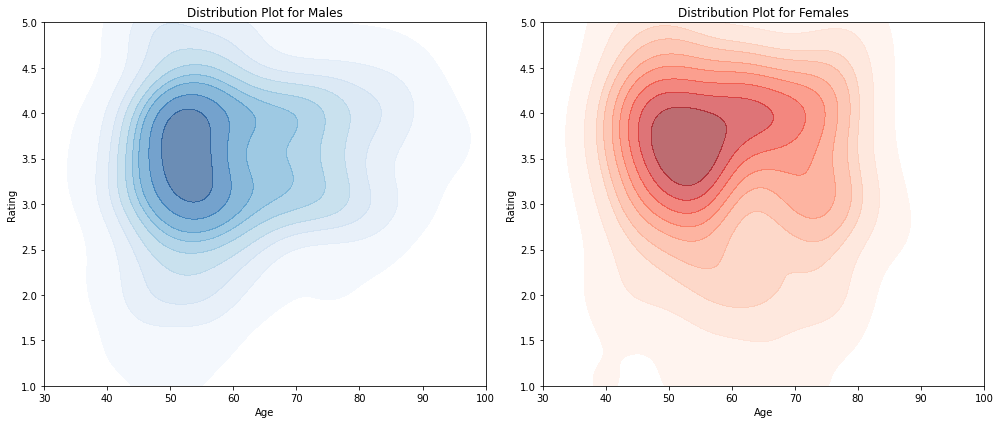

In [80]:
#Vista solo de Pelis de Musical
Scores_Horror=Score.filtra_df(df_sco, df_personas, df_peliculas, generosPeliculas=['Musical'])
Score.puntuacion_edad_genero(df_personas,Scores_Horror)